In [91]:
import numpy as np
np.__version__

'1.19.4'

In [92]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 理解Python数据类型

## 1.1 Python整形不仅仅是一个数值

python3.4中的一个整形实际包括4个部分：
- ob_refcnt是一个引用计数
- ob_type是变量类型编码
- ob_size 指定数据大小（长度）
- ob_digit 包含实际整形值

> 每一个Python对象都是一个C语言结构体

## 1.2 Python列表不仅仅是一个列表
Python列表可以存储可变多元素，为了获得这些灵活的类型，列表中的每一项都是一个完整的python对象，这样不利于存储和操作数据。Numpy式数组与之相反。![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png)


## 1.3 python也可以创建紧凑数组
但是Numpy在紧凑存储的基础上提供了高效操作

In [3]:
import array
L=list(range(10))
A=array.array('i',L)
L
A

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
import sys
print("python数组的内存大小：%d" %sys.getsizeof(L))
print("紧凑型python数组的内存大小: %d" %sys.getsizeof(A))

python数组的内存大小：104
紧凑型python数组的内存大小: 72


In [5]:
X=np.array(L)
print("numpy数组大小： %d" %sys.getsizeof(X))
F=np.array(L,dtype="float")
print("设定数据类型为float的numpy数组大小： %d" %sys.getsizeof(X))

numpy数组大小： 88
设定数据类型为float的numpy数组大小： 88


In [6]:
#从python列表创建的嵌套列表构成的Numpy多维数组
i=1
np.array([range(i,i+3) for i in [1,2,3]])

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

## 1.4 从头创建数组

In [7]:
# 创建一个长度为10的数组，数组的值都是0
np.zeros(10,dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# 创建一个3*5的浮点型数组，数组的值都是1
np.ones((3,5),dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [9]:
# 创建一个3*5的浮点型数组，数组的值都是3.14
np.full((3,5),3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [10]:
# 数组的值是线性序列，从0开始到20，步长2
np.arange(0,22,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [11]:
# 创建一个5个元素的数组，数组的值从0到1均匀分配
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [12]:
# 创建一个3*3的,在0-1均匀分布的随机数组
np.random.random((3,3))
np.random.rand(3,3)

array([[0.5669845 , 0.62483849, 0.18666242],
       [0.50876644, 0.5720969 , 0.33804607],
       [0.92272516, 0.67253489, 0.72284919]])

array([[0.23876638, 0.14825908, 0.47182468],
       [0.25170139, 0.20330361, 0.0584323 ],
       [0.25863351, 0.31150151, 0.66344526]])

In [13]:
# 创建一个3*3的,均值为0，方差为1的正态分布的随机数组
np.random.normal(0,1,(3,3))

array([[ 0.08546398, -0.76878401, -0.17738325],
       [-0.51263744, -0.4366804 ,  0.84496924],
       [ 0.30324169, -0.15686152,  0.03042887]])

In [14]:
# 创建一个3*3的[0,10）区间的随机整数类型
np.random.randint(0,10,(3,3))

array([[3, 0, 5],
       [8, 4, 4],
       [7, 7, 0]])

In [15]:
# 创建一个3*3的单位矩阵
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
# 创建一个由3个整数组成的未初始化的数组
np.empty(3)

array([1., 1., 1.])


|Data type|　　Description|  
|--- |---| 
|bool_|Boolean (True or False) stored as a byte  |
|int_　　　|Default integer type (same as C long; normally either int64 or int32)  |
|intc|Identical to C int (normally int32 or int64)  |
|intp　|Integer used for indexing (same as C ssize_t; normally either int32 or int64)  |
|int8	　　|Byte (-128 to 127)  
|int16	　　|Integer (-32768 to 32767)  
|int32	　　|Integer (-2147483648 to 2147483647)  |
|int64	　　|Integer (-9223372036854775808 to 9223372036854775807) | 
|uint8	　　|Unsigned integer (0 to 255)  |
|uint16　　	|Unsigned integer (0 to 65535)  |
|uint32　　	|Unsigned integer (0 to 4294967295)  |
|uint64　　	|Unsigned integer (0 to 18446744073709551615)|  
|float_	　　|Shorthand for float64.  |
|float16	|Half precision float: sign bit, 5 bits exponent, 10 bits mantissa  |
|float32|Single precision float: sign bit, 8 bits exponent, 23 bits mantissa  |
|float64|Double precision float: sign bit, 11 bits exponent, 52 bits mantissa|  
|complex_　	|Shorthand for complex128.  |
|complex64　|Complex number, represented by two 32-bit floats  |
|complex128　|Complex number, represented by two 64-bit floats  |

## Numpy数组基础

### Numpy数组的属性

In [17]:
np.random.seed(0)

x1=np.random.randint(10,size=6)
x2=np.random.randint(10,size=(3,4))
x3=np.random.randint(10,size=(3,4,5))

In [18]:
#数组的维度、每个维度的大小、数组的元素数量、数组元素的数据类型、
print("x3的维度：",x3.ndim)
print("x3每个维度的大小:",x3.shape)
print("x3数组的大小:",x3.size)
print("X3元素的数据类型：",x3.dtype)
print("X3元素的字节大小：",x3.itemsize)
print("x3 数组总字节大小：",x3.nbytes)

x3的维度： 3
x3每个维度的大小: (3, 4, 5)
x3数组的大小: 60
X3元素的数据类型： int32
X3元素的字节大小： 4
x3 数组总字节大小： 240


In [19]:
x2.size

12

### 数组索引：获取单个元素

In [20]:
x1
x1[-1]
x1[0]

array([5, 0, 3, 3, 7, 9])

9

5

In [21]:
x2
x2[0,0]

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

3

### 数组切片


In [22]:
x=np.arange(10)
x
x[:5]
x[5:]
x[4:5]
x[::2]
x[::-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4])

array([5, 6, 7, 8, 9])

array([4])

array([0, 2, 4, 6, 8])

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [23]:
x2
x2[:2,]
x2[:2,:3]

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

array([[3, 5, 2, 4],
       [7, 6, 8, 8]])

array([[3, 5, 2],
       [7, 6, 8]])

In [24]:
x2[0]

array([3, 5, 2, 4])

In [25]:
#numpy返回的是数组的视图而不是副本
x2_sub_1=x2
x2_sub_1[0]=[4,3,2,1]
x2

array([[4, 3, 2, 1],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [26]:
#如果要创建副本
x2_sub_2=x2.copy()
x2_sub_2[0]=[4,3,2,1]
x2

array([[4, 3, 2, 1],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

### 数组变形
reshape
newaxis

In [27]:
x2
x2.shape
x2.reshape((4,3))#
x2

array([[4, 3, 2, 1],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

(3, 4)

array([[4, 3, 2],
       [1, 7, 6],
       [8, 8, 1],
       [6, 7, 7]])

array([[4, 3, 2, 1],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [28]:
x=np.array([1,2,3])
x
x.reshape((1,3))
x[np.newaxis,:]

array([1, 2, 3])

array([[1, 2, 3]])

array([[1, 2, 3]])

### 数组拼接和分裂
拼接：concatenate vstack hstack
分裂：split hsplit vsplit 

In [29]:
x=np.array([1,2,3])
y=np.array([4,5,6])
z=np.array([7,8,9])
x
y
np.concatenate([x,y,z])

array([1, 2, 3])

array([4, 5, 6])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
y=x=np.arange(1,7).reshape(2,3)
np.concatenate([x,y])
np.concatenate([x,y],axis=1)
np.vstack([x,y])
np.hstack([x,y])
np.dstack([x,y])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

array([[[1, 1],
        [2, 2],
        [3, 3]],

       [[4, 4],
        [5, 5],
        [6, 6]]])

In [31]:
#数组分裂
x=np.random.randint(1,999,16)
x1,x2,x3=np.split(x,[3,5])
x
x1,x2,x3

array([ 48, 640, 132, 973, 869, 181, 847, 144, 661, 228, 955, 792, 720,
       910, 374, 854])

(array([ 48, 640, 132]),
 array([973, 869]),
 array([181, 847, 144, 661, 228, 955, 792, 720, 910, 374, 854]))

In [32]:
x=x.reshape((4,4))
upper,lower=np.vsplit(x,[2])
left,right=np.hsplit(x,[2])
x
print("vsplit:",(upper,lower))
print("hsplit:",(left,right))

array([[ 48, 640, 132, 973],
       [869, 181, 847, 144],
       [661, 228, 955, 792],
       [720, 910, 374, 854]])

vsplit: (array([[ 48, 640, 132, 973],
       [869, 181, 847, 144]]), array([[661, 228, 955, 792],
       [720, 910, 374, 854]]))
hsplit: (array([[ 48, 640],
       [869, 181],
       [661, 228],
       [720, 910]]), array([[132, 973],
       [847, 144],
       [955, 792],
       [374, 854]]))


## Numpy的通用函数
Numpy数组计算更快的关键是利用向量化操作，通常在Numpy的通用函数中实现（ufunc）

### 缓慢的循环

In [33]:
def compute_reciprocals(values):
    output=np.empty(len(values))
    for i in range(len(values)):
        output[i]=1.0/values[i]
    return output
values=np.random.randint(1,10,size=5)


In [34]:
big_array=np.random.randint(1,100,size=1000000)
%timeit compute_reciprocals(big_array)

3.4 s ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 通用函数介绍

In [35]:
%timeit (1.0/big_array)

4.74 ms ± 25 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 探索通用函数
更加专用的通用函数可以采用scipy.special库包含的函数

In [36]:
#数组的算术运算
np.add
np.subtract
np.negative
np.multiply
np.divide
np.floor_divide
np.power
np.mod
np.abs

<ufunc 'add'>

<ufunc 'subtract'>

<ufunc 'negative'>

<ufunc 'multiply'>

<ufunc 'true_divide'>

<ufunc 'floor_divide'>

<ufunc 'power'>

<ufunc 'remainder'>

<ufunc 'absolute'>

In [37]:
#三角函数
theta=np.linspace(0,np.pi,3)
print("theta=",theta)
print("sin(theta)=",np.sin(theta))
print("cos(theta)=",np.cos(theta))
print("tan(theta)=",np.tan(theta))

theta= [0.         1.57079633 3.14159265]
sin(theta)= [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta)= [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta)= [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [38]:
#逆三角函数
x=[-1,0,1]
print("x=",x)
print("arcsin(x)=",np.arcsin(x))
print("arccos(x)=",np.arccos(x))
print("arctan(x)=",np.arctan(x))


x= [-1, 0, 1]
arcsin(x)= [-1.57079633  0.          1.57079633]
arccos(x)= [3.14159265 1.57079633 0.        ]
arctan(x)= [-0.78539816  0.          0.78539816]


In [39]:
#指数和对数
x=[1,2,3]
print("x=",x)
print("e^x=",np.exp(x))
print("2^x=",np.exp2(x))
print("3^x=",np.power(3,x))

x=[1,2,4,10]
print("x=",x)
print("ln(x)=",np.log(x))
print("log2(x)=",np.log2(x))
print("log10(x)=",np.log10(x))

x= [1, 2, 3]
e^x= [ 2.71828183  7.3890561  20.08553692]
2^x= [2. 4. 8.]
3^x= [ 3  9 27]
x= [1, 2, 4, 10]
ln(x)= [0.         0.69314718 1.38629436 2.30258509]
log2(x)= [0.         1.         2.         3.32192809]
log10(x)= [0.         0.30103    0.60205999 1.        ]


In [40]:
#特殊版本的函数，对非常小的输入值保持较好的精度
x=[0,0.001,0.01,0.1]
print("exp(x)-1=",np.expm1(x))
print("log(1+x)=",np.log1p(x))

exp(x)-1= [0.         0.0010005  0.01005017 0.10517092]
log(1+x)= [0.         0.0009995  0.00995033 0.09531018]


### 高级的通用函数特性

In [41]:
# 指定存储输出的变量，比起输出结果存储在临时变量中再赋值给结果变量更节省内存
x=np.arange(5)
y=np.empty(5)
np.multiply(x,10,out=y)
print(y)

array([ 0., 10., 20., 30., 40.])

[ 0. 10. 20. 30. 40.]


In [42]:
#聚合
x=np.arange(1,6)
np.add.reduce(x)
np.multiply.reduce(x)
np.add.accumulate(x)
np.multiply.accumulate(x)

15

120

array([ 1,  3,  6, 10, 15], dtype=int32)

array([  1,   2,   6,  24, 120], dtype=int32)

In [43]:
#外积
np.multiply.outer(x,x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## 4 聚合：最小值、最大值、其他值

### 数组值求和

In [44]:
L=np.random.random(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

204 ms ± 6.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
439 µs ± 5.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 最小值和最大值

In [45]:
big_array.min()
big_array.max()
big_array.sum()

1

99

49989047

In [46]:
#按维度聚合
M=np.random.random((3,4))
M
M.min(axis=0)
M.min(axis=1)

array([[0.78094553, 0.24695578, 0.55846899, 0.36822725],
       [0.47507029, 0.2898924 , 0.25126433, 0.56789633],
       [0.5527829 , 0.03901305, 0.53291053, 0.61521127]])

array([0.47507029, 0.03901305, 0.25126433, 0.36822725])

array([0.24695578, 0.25126433, 0.03901305])

其他聚合函数  

|Function Name|NaN-safe Version|Description|
| ---|---|---|  
|np.sum	|np.nansum|	Compute sum of elements|  
|np.prod|	np.nanprod|	Compute product of elements  |
|np.mean|	np.nanmean	|Compute mean of elements  |
|np.std	|np.nanstd	|Compute standard deviation | 
|np.var|	np.nanvar|	Compute variance  |
|np.min|	np.nanmin	|Find minimum value  |
|np.max|	np.nanmax|	Find maximum value | 
|np.argmin|	np.nanargmin|	Find index of minimum value  |
|np.argmax|	np.nanargmax|	Find index of maximum value  |
|np.median|	np.nanmedian|	Compute median of elements  |
|np.percentile	|np.nanpercentile|	Compute rank-based statistics of elements  |
|np.any|	N/A	|Evaluate whether any elements are true  |
|np.all|	N/A	|Evaluate whether all elements are true  |

### 美国总统的身高

In [47]:
import pandas as pd
pd.__version__
data=pd.read_csv('data/president_heights.csv')
heights=np.array(data['height(cm)'])
print("平均身高：",heights.mean())
print("身高标准差：",heights.std())
print("最矮:",heights.min())
print("最高：",heights.max())
print("25%位数：",np.percentile(heights,25))
print("中位数：",np.median(heights))
print("75%位数：",np.percentile(heights,75))

'1.1.5'

平均身高： 179.73809523809524
身高标准差： 6.931843442745892
最矮: 163
最高： 193
25%位数： 174.25
中位数： 182.0
75%位数： 183.0


(array([ 1.,  2.,  3.,  5.,  3.,  6., 12.,  3.,  5.,  2.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '美国总统身高分布')

Text(0.5, 0, '身高（厘米）')

Text(0, 0.5, '人数')

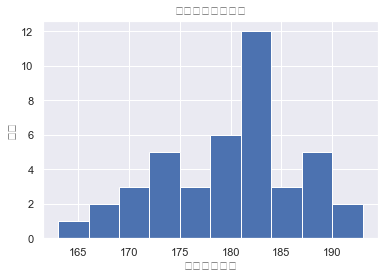

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import warnings
warnings.filterwarnings("ignore")
plt.hist(heights)
plt.title("美国总统身高分布")
plt.xlabel("身高（厘米）")
plt.ylabel("人数")

## 数组广播
### 广播的介绍

In [49]:
a=np.arange(3)
b=np.arange(3)[:,np.newaxis]
a
b
a+b


array([0, 1, 2])

array([[0],
       [1],
       [2]])

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 广播的规则
- 如果维度数不等，小维度数组会在最左边补1
- 如果在任何一个维度都不等，数组的形状会沿着维度为1的维度扩展以匹配另一个数组
- 如果两个数组的形状在任一维度都不匹配且没有维度等于1，则引发异常

In [50]:
M=np.ones((2,3))
a=np.arange(3)
M
a
M+a

array([[1., 1., 1.],
       [1., 1., 1.]])

array([0, 1, 2])

array([[1., 2., 3.],
       [1., 2., 3.]])

In [51]:
a=np.arange(3).reshape((3,1))
b=np.arange(3)
a
b
a+b

array([[0],
       [1],
       [2]])

array([0, 1, 2])

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [52]:
m=np.ones((3,2))
a=np.arange(3)
m+a


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [ ]:
m+a[:,np.newaxis]

### 广播的实际应用


In [ ]:
#数组的归一化
X=np.random.random((10,3))
Xmean=X.mean(0)
X_centered=X-Xmean
X_centered.mean(0)

In [ ]:
#画一个二维数组
x=np.linspace(0,5,50)
y=np.linspace(0,5,50)[:,np.newaxis]
z=np.sin(x)**10+np.cos(10+y*x)*np.cosx(x)

plt.imshow(z,origin='lower')

## 比较、掩码和布尔逻辑

### 示例：统计下雨天数

In [ ]:
rainfall=pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches=rainfall/254
inches.shape

In [ ]:
plt.hist(inches,40)


### 和通用函数类似的比较操作

当numpy数组进行算术运算时，numpy内部会自动把算术运算符替换成对应的通用函数

|运算符|对应的通用函数|
|---|---|
|==|np.equeal|
|!=|np.not_equal|
|<|np.less|
|<=|np.less_equal|
|>|np.greater|
|>=|np.greater_equal|

In [ ]:
x=np.array([1,2,3,4,5,6])
x<3
x>3
(2*x)==(x**2)

### 操作布尔数组

In [ ]:
rng=np.random.RandomState(0)
x=rng.randint(10,size=(3,4))
x

In [ ]:
# 统计记录的个数
#np.count_nonzero np.sum np.any np.all
np.count_nonzero(x<6)
np.sum(x<6)
np.sum(x<6,axis=1)
np.any(x>8)
np.all(x<10)
np.all(x<8,axis=1)

#布尔运算符

|运算符|对应通用函数|
|---|---|
|&|np.bitwise_and|
|｜|np.bitwise_or|
|^|np.bitwise_xor|
|~|np.bitwise_not|

In [ ]:
#降水量在0.5英寸-1英寸之间的天数
np.sum((inches>0.5)&(inches<1))
np.sum(~((inches>=1)|(inches<=0.5)))

In [ ]:
print("不下雨的天数：",np.sum(inches==0))
print("下雨的天数：",np.sum(inches!=0))
print("降雨量大于0.5英寸的天数：",np.sum(inches>0.5))
print("降雨量小于0.1英寸的天数：",np.sum((inches>0)&(inches<0.1)))

In [ ]:
### 布尔数组作为掩码

In [ ]:
x
x<5
x[x<5]

In [ ]:
rainy=(inches>0)
summer=(np.arange(365)-172<90)&(np.arange(365)-172>0)

print("2014年单日降雨量中位数：",np.median(inches[rainy]))
print("2014年夏季单日降雨量中位数:",np.median(inches[summer]))
print("2014年夏季最大单日降雨量：", np.max(inches[summer]))
print("2014年非夏季单日降雨量中位数：",np.median(inches[rainy&~summer]))

## 花哨的索引
利用花哨的索引，结果的形状与索引数组形状一致，而不是与被索引形状一致

In [93]:
rand=np.random.RandomState(42)
x=rand.randint(100,size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [54]:
[x[3],x[7],x[2]]

ind=[3,7,2]
x[ind]

ind=np.array([[3,7],[4,5]])
x[ind]

[71, 86, 14]

array([71, 86, 14])

array([[71, 86],
       [60, 20]])

In [66]:
X=np.arange(12).reshape((3,4))
X
row=np.array([0,1,2])
col=np.array([2,1,3])
X[row,col]
X[row[:,np.newaxis],col]




array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([ 2,  5, 11])

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

### 花哨索引与其他

In [67]:
X
X[2,[2,0,1]]#花哨索引和简单索引组合使用
X[1:,[2,0,1]]#花哨索引和切片索引组合使用
mask=np.array([1,0,1,0],dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([10,  8,  9])

array([[ 6,  4,  5],
       [10,  8,  9]])

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### 示例：选择随机点

In [69]:
mean=[0,0]
cov=[[1,2],[2,5]]
X=rand.multivariate_normal(mean,cov,100)
X.shape


(100, 2)

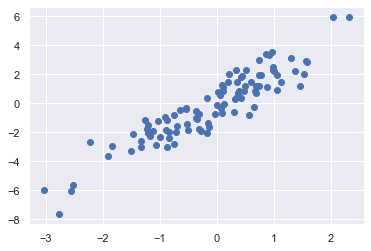

In [72]:
plt.scatter(X[:,0],X[:,1])

In [74]:
indices=np.random.choice(X.shape[0],20,replace=False)
indices
selection=X[indices]
selection.shape

array([87, 54,  5, 34, 10, 73, 29, 22, 30, 36, 45, 61, 38, 62,  7, 27, 55,
       79, 41, 53])

(20, 2)

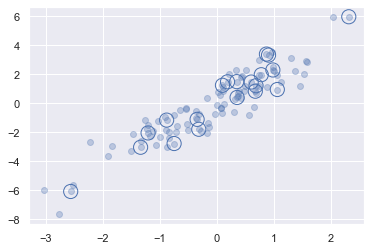

In [79]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],facecolor='none',edgecolor='b',s=200)

### 用花哨的索引修改值

In [81]:
x=np.arange(10)
i=np.array([2,1,8,4])
x[i]=99
x
x[i]-=10
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [83]:
x=np.zeros(10)
i=[2,3,3,4,4,4]
x[i]+=1
x

x=np.zeros(10)
np.add.at(x,i,1)
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

### 示例：数据区间划分

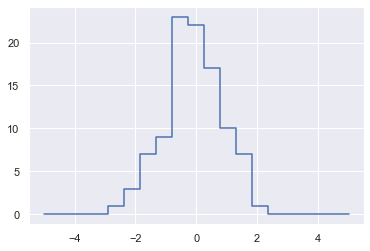

In [90]:
np.random.seed(42)
x=np.random.randn(100)
#手动计算直方图
bins=np.linspace(-5,5,20)
counts=np.zeros_like(bins)
i=np.searchsorted(bins,x)
np.add.at(counts,i,1)

plt.plot(bins,counts,linestyle='steps')

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

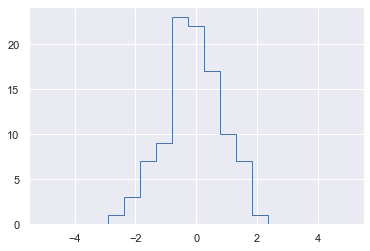

In [89]:
plt.hist(x,bins,histtype='step')

## 数组的排序

### numpy中的快速排序：np.sort np.argsort

In [96]:
X=rand.randint(0,10,(4,6))
X
np.sort(X,axis=0)

array([[1, 5, 5, 9, 3, 5],
       [1, 9, 1, 9, 3, 7],
       [6, 8, 7, 4, 1, 4],
       [7, 9, 8, 8, 0, 8]])

array([[1, 5, 1, 4, 0, 4],
       [1, 8, 5, 8, 1, 5],
       [6, 9, 7, 9, 3, 7],
       [7, 9, 8, 9, 3, 8]])

### 部分排序:分隔

In [101]:
x=np.random.randint(1,10,10)
np.partition(x,3)

array([1, 1, 2, 2, 6, 5, 3, 7, 5, 6])

### K个最近邻

array([[0.47221493, 0.11959425],
       [0.71324479, 0.76078505],
       [0.5612772 , 0.77096718],
       [0.4937956 , 0.52273283],
       [0.42754102, 0.02541913],
       [0.10789143, 0.03142919],
       [0.63641041, 0.31435598],
       [0.50857069, 0.90756647],
       [0.24929223, 0.41038292],
       [0.75555114, 0.22879817]])

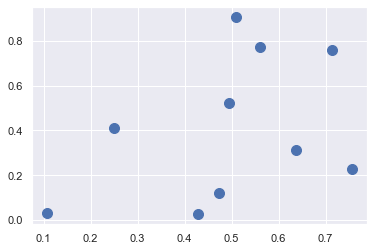

In [105]:
X=rand.rand(10,2)
X
plt.scatter(X[:,0],X[:,1],s=100)

In [108]:
dist_sq=np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2,axis=-1)
dist_sq.diagonal()
nearest=np.argsort(dist_sq,axis=1)
nearest

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([[0, 4, 6, 9, 8, 5, 3, 2, 1, 7],
       [1, 2, 7, 3, 6, 9, 8, 0, 4, 5],
       [2, 7, 1, 3, 6, 8, 9, 0, 4, 5],
       [3, 6, 2, 8, 1, 7, 9, 0, 4, 5],
       [4, 0, 5, 6, 9, 8, 3, 2, 1, 7],
       [5, 4, 0, 8, 6, 3, 9, 2, 1, 7],
       [6, 9, 3, 0, 4, 8, 1, 2, 5, 7],
       [7, 2, 1, 3, 8, 6, 9, 0, 4, 5],
       [8, 3, 0, 6, 5, 4, 2, 9, 7, 1],
       [9, 6, 0, 4, 3, 1, 8, 2, 5, 7]], dtype=int32)

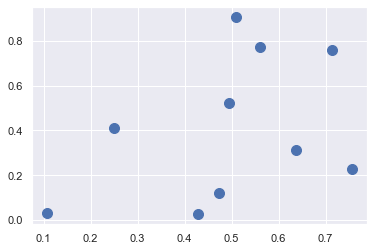

In [112]:
k=2
nearest_partiton=np.argpartition(dist_sq,k+1,axis=1)
plt.scatter(X[:,0],X[:,1],s=100)


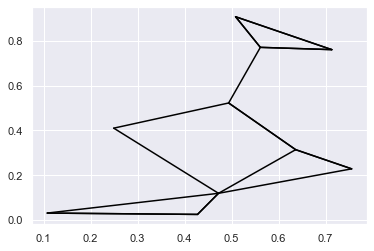

In [115]:
k=2
for i in range(X.shape[0]):
    for j in nearest_partiton[i,: k+1]:
        plt.plot(*zip(X[j],X[i]),color='black')

## 结构化数据：Numpy的结构化数组b


In [117]:
x=np.zeros(4,dtype={'names':('name','age','weight'),'formats':('U10','i4','f8')})
x.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [119]:
name=['Alice','Bob','Cathy','Doug']
age=[25,45,67,314]
weight=[55,54.2,435,23]

x['name']=name
x['age']=age
x['weight']=weight

x

array([('Alice',  25,  55. ), ('Bob',  45,  54.2), ('Cathy',  67, 435. ),
       ('Doug', 314,  23. )],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [120]:
x['name']
x[0]
x[-1]['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

('Alice', 25, 55.)

'Doug'

numpy的数据类型简写表

|Character|	Description|	Example|
|---|---|---|---|
|'b'|	Byte|	np.dtype('b')|
|'i'|	Signed| integer	np.dtype('i4') == np.int32|
|'u'|	Unsigned integer|	np.dtype('u1') == np.uint8|
|'f'|	Floating point|	np.dtype('f8') == np.int64|
|'c'|	Complex floating point|	np.dtype('c16') == np.complex128|
|'S', 'a'|	String|	np.dtype('S5')|
|'U'|	Unicode string	|np.dtype('U') == np.str_|
|'V'|	Raw data (void)	|np.dtype('V') == np.void|

### 更高级的复合类型

In [121]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])#用元组列表方式定义数组
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])


(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### 记录数组：结构化数组的扭转

In [126]:
data_rec=x.view(np.recarray)

%timeit x['age']
%timeit data_rec['age']
%timeit data_rec.age

222 ns ± 4.93 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.98 µs ± 28.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.19 µs ± 27.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
